<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        Generalized Regression and Feature Selection
    </h1></td>
    <td width="20%">
    <div style="text-align: right">
    <b> Machine Learning 2020</b> <br>
    <b>Lab01.02 - 19/05/2020<br>
    Marco Cannici <br>
    <a href="mailto:marco.cannici@polimi.it">marco.cannici@polimi.it</a>
        <p style="height:1pt"></p>
    &#8618; <a href="http://tiny.cc/ML2020Lab01">tiny.cc/ML2020Lab01</a>
    </div>
    </td>
    <td width="100px"> 
        <a href="http://tiny.cc/ML2020Lab01">
        <img align="right", width="100px" src='https://chart.googleapis.com/chart?cht=qr&chl=http://tiny.cc/ML2020Lab01&chs=180x180&choe=UTF-8&chld=L|0' alt=''>
        </a>
    </td>
</tr>
</table>

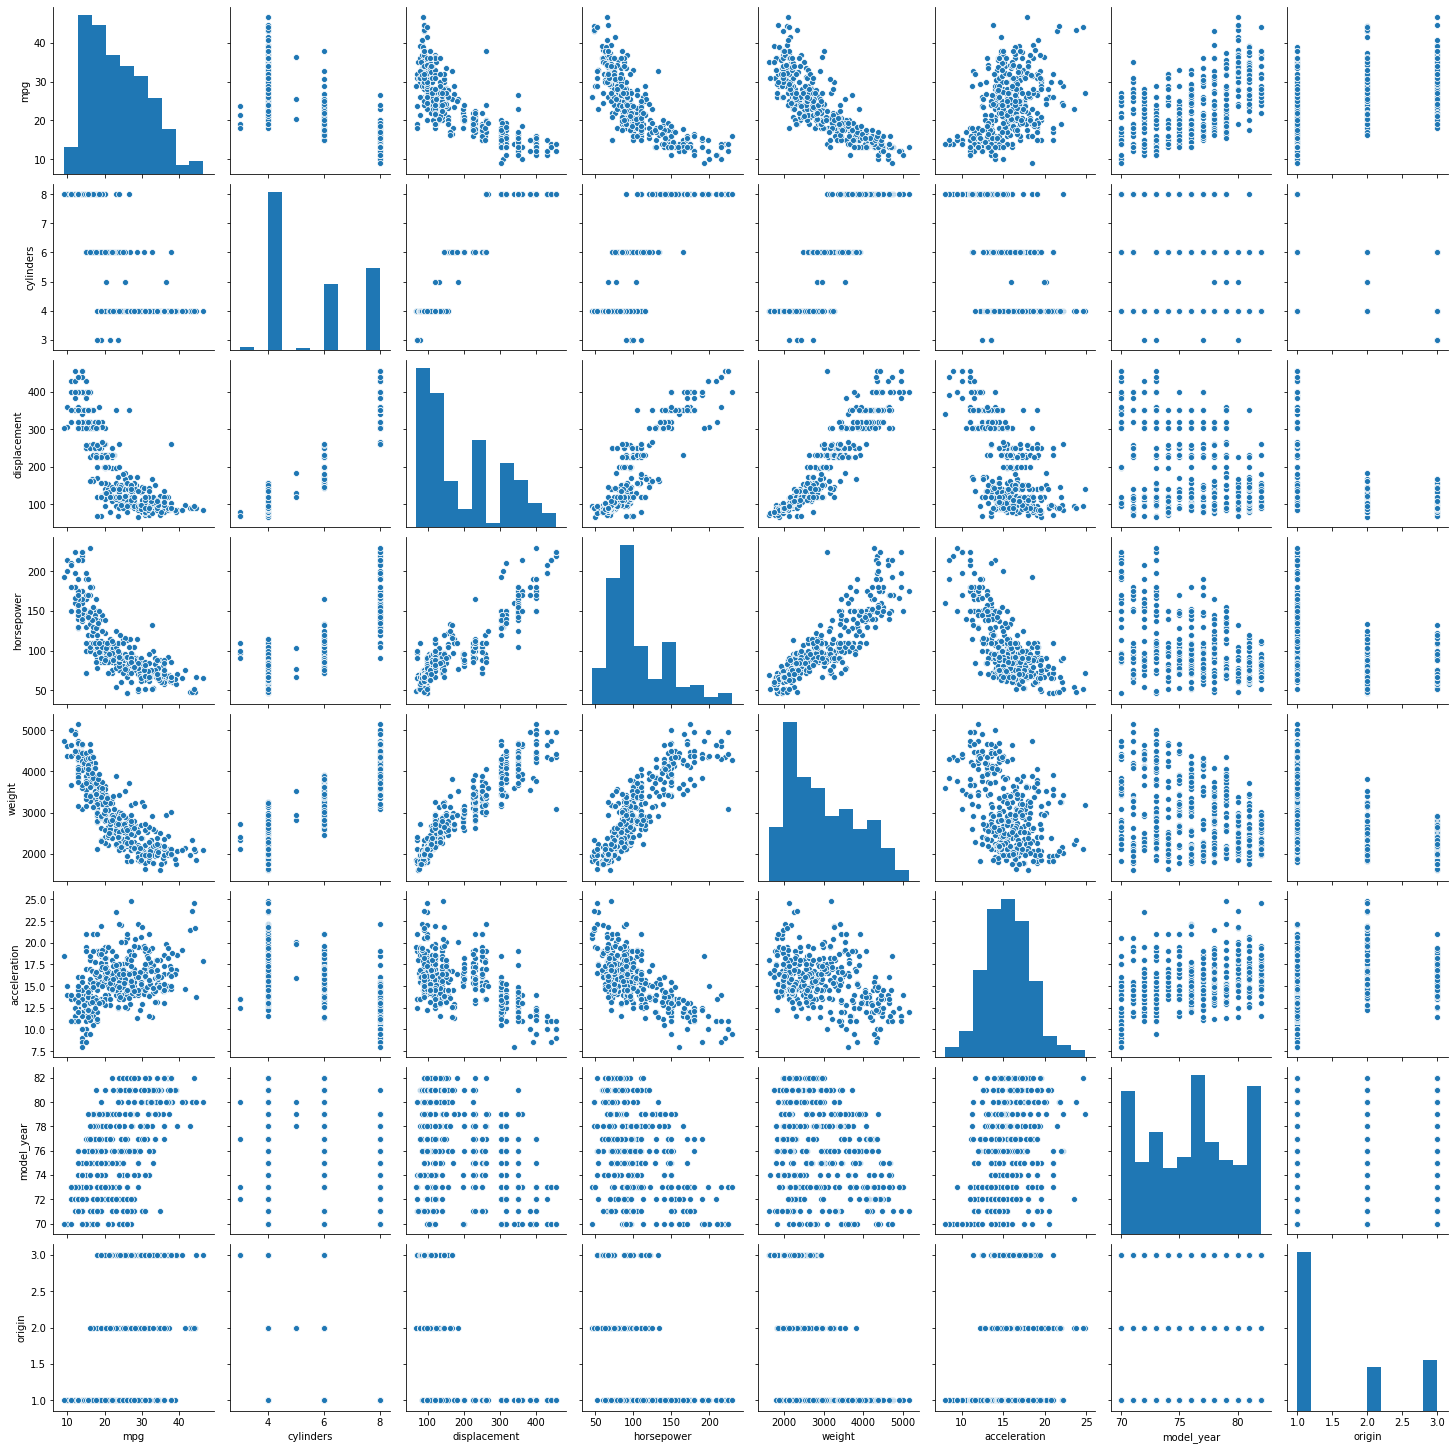

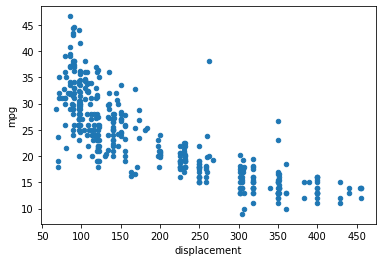

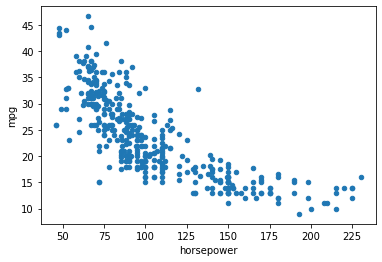

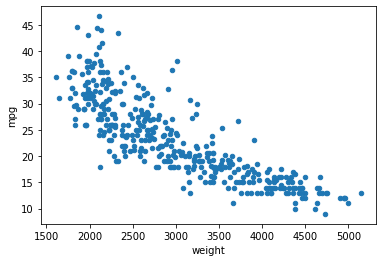

X.shape (392, 7)
X.dtype
 cylinders       float32
displacement    float32
horsepower      float32
weight          float32
acceleration    float32
model_year      float32
origin          float32
dtype: object
y.shape (392,)
y.dtype
 float32
X_train.shape  (274, 7)
X_test.shape  (118, 7)
(274,) (274,)
(118,) (118,)
Estimates: beta0 = 46.24618148803711, beta1 = -0.007652295287698507
Train RSS = 5402.6171875
Test RSS = 1918.7105712890625


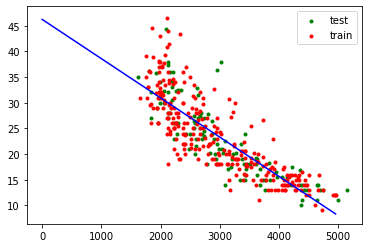

RSE = 4.456743563336153
SE(beta_0)^2 = 0.9476957879993088 
SE(beta_1)^2 = 9.982867463313742e-08
The interval [44.330, 48.163] (size 3.833) contains the true beta_0 with 95.0% probability
The interval [-0.008, -0.007] (size 0.001) contains the true beta_1 with 95.0% probability
beta1 (weight)  t-statistic -24.22, p-value 7.470600959258328e-70
Reject H0: A relation between X and y exists
beta0 (intercept)  t-statistic 47.51, p-value 1.035199502946727e-133
Train RSS = 2883.9319962442937
Test RSS = 1442.3275211902853
beta_cylinders = -26.921953217123303
beta_displacement = -0.46854601251005934
beta_horsepower = 0.026813144937589583
beta_weight = -0.0010997221347770966
beta_acceleration = -0.00758132205732026
beta_model_year = 0.24475714452998057
beta_origin = 0.8461540125261429
P(making a mistake) = 0.05
P(not making a mistake) = 0.95
P(not making any mistake) = 0.8573749999999999
P(making at least one mistake) = 0.1426250000000001
P(not making any mistake) = 0.0059205292203339975
P(making

In [1]:
# Run the first notebook inside the current environment
# This will "import" the functions we defined before
# for statistical tests
%run lab01.01.complete-StatisticalLearningLinearRegression.ipynb

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy

np.random.seed(0)

# Linear Regression with Scikit-Learn

Scikit-learn is one of the most complete machine learning frameworks available in Python. It provides efficient implementations of a large number of algorithms, it is very well documented and provides a clean and uniform API.

A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.

### Data Format

Scikit-Learn is based on Numpy arrays and it also supports Pandas DataFrames.
We usually interact with the Scikit-Learn API using two (or three) distinct matrices:

- **Feature matrix**: It contains all the samples in our training set and, for each sample, it specify all its features (i.e., its attributes). It is usually  referred as ``X`` in Scikit-Learn functions and it is assumed to be of shape ``[n_samples, n_features]``. That is, rows represent samples whereas colums the different features.

- **Target array**: In supervised tasks an additional, distinct, array is required to specify the target value we want to learn. It is usually called ``y`` and it must have shape ``[n_samples, n_targets]`` (tipically ``[n_samples, 1]`` or even ``[n_samples]``)

## Scikit-learn API

Almost all the Scikit-Learn predictior objects share the same API. Based on the type of predictior (e.g., supervised vs unpupervised), however, some methods or attributes may not be implemented or used.

In general, we interact with the API with the following steps:

- **Model selection**: we choose a particular model, i.e., we import its class from Scikit-Learn
- **Hyperparameter selection**: we choose the parameters (e.g., number of clusters, the N parameter in KNN) creating a particular instance of the predictior
- **Data processing**: we arrage data into a feature matrix ``X`` and a set of target values ``y``, eventually splitting the dataset into training, validation and test sets
- **Model fitting**: we train the model calling the ``estimator.fit(X, y)`` method
- **Test/inference on new data**: we apply the model on test samples to validate its performance. We generally use the ``estimator.predict(X_test)`` function for that.

Let's compare the results we obtained by implementing the least squares solution from scratch with the scikit-learn solution

## Linear Regression


In [2]:
X_train.shape
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

(274,)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# Fit the LinearRegression predictor
model = LinearRegression(fit_intercept=True) # 1- hyperparams selection
model = model.fit(X_train, y_train)          # 2- model fitting
y_predict_test = model.predict(X_test)       # 3- prediction
y_predict_train = model.predict(X_train)

print("Single feature (weights) model")
print("Train RSS score ", rss(y_train, y_predict_train))
print("Train R2 score ", r2_score(y_train, y_predict_train))
print("Train  MSE score ", mean_squared_error(y_train, y_predict_train))
print("Test RSS score ", rss(y_test, y_predict_test))
print("Test R2 score ", r2_score(y_test, y_predict_test))
print("Test  MSE score ", mean_squared_error(y_test, y_predict_test))

# Fit the LinearRegression predictor
model = LinearRegression(fit_intercept=True)      # 1- hyperparams selection
model = model.fit(X_train_full, y_train)          # 2- model fitting
y_predict_test = model.predict(X_test_full)       # 3- prediction
y_predict_train = model.predict(X_train_full)

print("\nFull model")
print("Train RSS score ", rss(y_train, y_predict_train))
print("Train R2 score ", r2_score(y_train, y_predict_train))
print("Train  MSE score ", mean_squared_error(y_train, y_predict_train))
print("Test RSS score ", rss(y_test, y_predict_test))
print("Test R2 score ", r2_score(y_test, y_predict_test))
print("Test  MSE score ", mean_squared_error(y_test, y_predict_test))

Single feature (weights) model
Train RSS score  5402.617
Train R2 score  0.6831982698249341
Train  MSE score  19.71758
Test RSS score  1918.7106
Test R2 score  0.7156165083745584
Test  MSE score  16.26026

Full model
Train RSS score  2883.9321
Train R2 score  0.8308903515404564
Train  MSE score  10.5253
Test RSS score  1442.3274
Test R2 score  0.7862240884720136
Test  MSE score  12.223113


```
From the previous notebook:

Single feature (weights) model
Train RSS = 5402.6171875
Test RSS = 1918.7105712890625

Full model
Train RSS = 2883.9319962442937
Test RSS = 1442.3275211902853
```

In [29]:
for idx, col_name in enumerate(X_all_features):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))
print("The intercept is {:0.3f}".format(model.intercept_))

The coefficient for cylinders is -0.4685444235801697
The coefficient for displacement is 0.026813142001628876
The coefficient for horsepower is -0.001099705114029348
The coefficient for weight is -0.007581318728625774
The coefficient for acceleration is 0.24475711584091187
The coefficient for model_year is 0.8461540341377258
The coefficient for origin is 1.487007737159729
The intercept is -26.922


In [30]:
betas = np.array([model.intercept_, *model.coef_]).reshape(-1, 1)
show_stats(X_train_full, y_train, betas, ['Intercept', *X_all_features], alpha=0.001)

,Name,Coefficients,Standard Errors,t-stat,p-value,reject H0
0,Intercept,-26.921978,5.560220,-4.841891,2.180048e-06,True
1,cylinders,-0.468544,0.398713,-1.175142,2.409848e-01,False
2,displacement,0.026813,0.009569,2.801974,5.450964e-03,False
3,horsepower,-0.001100,0.017137,-0.064170,9.488825e-01,False
4,weight,-0.007581,0.000843,-8.994593,4.513232e-17,True
5,acceleration,0.244757,0.120375,2.033292,4.301203e-02,False
6,model_year,0.846154,0.060575,13.968642,1.167998e-33,True
7,origin,1.487008,0.326320,4.556900,7.906953e-06,True


# Polynomial Regression

One common way to increase the expressive power of linear models is to transform features using nonlinear functions. One option is to construct polynomial features from the coefficients.

In case of two features, the standard linear regression model fits a plane (ie, it finds the best plane that describe the data):

$\hat{y} = w_0 + w_1 x_1 + w_2 x_2$

If we combine features in second-order polynomials, we can fit a parabolod to the data instead on a simple place.

**Notice: the model is still linear in the parameter!**

$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$

$\hat{y} = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$

In [31]:
from sklearn.preprocessing import PolynomialFeatures

# Transform each feature into polynomial features based on the degree.
# Eg: in case of degree 2 we have the original features plus the product
# of each pair of features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly = poly.fit(X_train_small)

# Applies the transformation
X_train_poly = poly.transform(X_train_small)
X_test_poly = poly.transform(X_test_small)

# With degree 2 we have: x1,x2,x3,x1x1,x1x2,x1x3,x2x2,x2x3,x3x3
print("X_train_small.shape", X_train_small.shape, " X_poly_train.shape", X_train_poly.shape)
print("X_train_small.shape", X_test_small.shape, " X_poly_train.shape", X_test_poly.shape)

X_train_small.shape (274, 3)  X_poly_train.shape (274, 9)
X_train_small.shape (118, 3)  X_poly_train.shape (118, 9)


**Note:** `PolynomialFeatures` by default has a `include_bias=True` which automatically adds an all-ones column, representing the case in which all features appear with 0 power. This in linear models act as an intercept.

We can either: 
- Add the additional all-ones features (`include_bias=True`) and use a `LinearRegressor(fit_intercept=False)`
- Or remove it (`include_bias=False`) and add it later with `LinearRegressor(fit_intercept=True)`

### Train

Once trained, we test the model performance on the test set

In [32]:
# Fit the LinearRegression predictor
model = LinearRegression(fit_intercept=True)           
model.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model Evaluation

In [33]:
from sklearn.metrics import r2_score, mean_squared_error
print("Train R2 score ", r2_score(y_train, model.predict(X_train_poly)))
print("Train MSE score ", mean_squared_error(y_train, model.predict(X_train_poly)))

print("Test R2 score ", r2_score(y_test, model.predict(X_test_poly)))
print("Test MSE score ", mean_squared_error(y_test, model.predict(X_test_poly)))

Train R2 score  0.8648932232281064
Train MSE score  8.4089775
Test R2 score  0.844369867097472
Test MSE score  8.8984995


```
Single feature (weights) model
Train R2 score  0.6831982698249341
Train  MSE score  19.71758
Test R2 score  0.7156165083745584
Test  MSE score  16.26026

Full model
Train R2 score  0.8308903515404564
Train  MSE score  10.5253
Test R2 score  0.7862240884720136
Test  MSE score  12.223113
```

### Plot the polynomial line (single feature)

Let's see the polynomial features in action on the simple single feature (weight) model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=6, include_bias=False,
                                    interaction_only=False, order='C')),
                ('lr',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

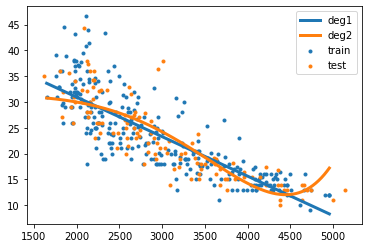

In [34]:
from sklearn.pipeline import Pipeline

def plot_poly_line(model, X, label=None):
    xmin, xmax = X.min(), X.max()
    fake_X = np.linspace(xmin, xmax, 1000).reshape(-1, 1)
    fake_y = model.predict(fake_X)
    plt.plot(fake_X, fake_y, label=label, linewidth=3)

# Simple linear model with 'weight' feature
model_deg1 = LinearRegression()
model_deg1.fit(X_train, y_train)

# Polynomial model with degree 2
model_deg2 = Pipeline([
    ('poly', PolynomialFeatures(degree=6, include_bias=False)),
    ('lr', LinearRegression())])
model_deg2.fit(X_train, y_train)


plt.scatter(X_train, y_train, label="train", marker=".")
plt.scatter(X_test, y_test, label="test", marker=".")
plot_poly_line(model_deg1, X_train, "deg1")
plot_poly_line(model_deg2, X_train, "deg2")
plt.legend()

# Cross Validation

Using a validation set is very useful to select values for hyper-parameters (i.e., parameters we cannot directly optimize with the training algorithm). However, our parameter selection is still limited to how good and general (or similar to the actual test set) our validation set, especially if the training / validation set is small!

To select the best hyper-parameters that work well over most datasets (i.e., small variations of the dataset), we can simulate to have multiple training and validation sets. These are calld **folds**. We iteratively reserve a part of the training set for validation and train the model on the remaining data. 

**The overall validation score is the average score on all the validation sets.**

Simple validation: 
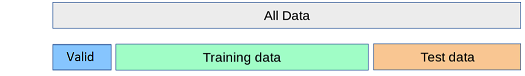

K-fold cross validation: 
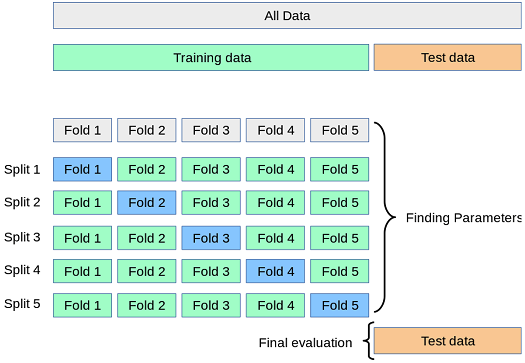

### The `cross_val_score` method

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score?

The `sklearn` package provides the `cross_val_score` function to perform model evaluation. The function, given a dataset, automatically:
- splits it into different folds
- trains the model on the training folds
- evaluate the model on the validation folds
- return as a result the validation scores computed on each split

**With the `scoring` we can control which metric is applied each time to compute the validation scores.**

In the most general case, `scoring` is a **function** having the following signature:
```python
def scorer(model, X, y):
    #...
    return score

```

Given a **metric**, i.e., a function with following signature:
```python
def metric(y_predict, y_true):
    #...
    return score

```
we can obtain a scorer using the `make_scorer` method.



Best degree:  3 
Val score:  0.8612872729305266
Test score: 0.8461981959659121


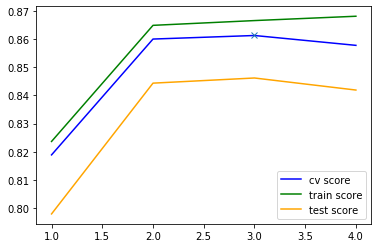

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline

# NOTE: The API always maximises the score, so score that
# must be minimized are retured as negative values!
r2_scorer = make_scorer(r2_score,
                        greater_is_better=True)
# or ...
# mse_scorer = 'neg_mean_squared_error'

degree = list(range(1,5))
val_scores = np.zeros(len(degree))
test_scores = np.zeros(len(degree))
train_scores = np.zeros(len(degree))
# Validation
for i, d in enumerate(degree):
    model = Pipeline([('poly', PolynomialFeatures(degree=d, include_bias=False)),
                      ('linear', LinearRegression(fit_intercept=True))])
    scores = cross_val_score(model, X_train_small, y_train, scoring=r2_scorer, cv=5)
    val_scores[i] = np.mean(scores)
    
    model = model.fit(X_train_small, y_train)
    train_scores[i] = r2_score(y_train, model.predict(X_train_small))
    test_scores[i] = r2_score(y_test, model.predict(X_test_small))

# Identifies which is the best degree
best_model_idx = np.argmax(val_scores)
best_degree = degree[best_model_idx]
# And the corresponding (best) validation score
best_val_score = val_scores[best_model_idx]
print("Best degree: ", best_degree,
      "\nVal score: ", best_val_score)
    
    
# Train again the Pipeline using the best parameter and the whole training set
model = Pipeline([('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),
                  ('linear', LinearRegression(fit_intercept=True))])
# Note: we train on X_train_small + X_val
model = model.fit(X_train_small, y_train)
y_predict = model.predict(X_test_small)
test_score = r2_score(y_test, y_predict)

print("Test score:", test_score)

_ = plt.plot(degree, val_scores, label="cv score", color="blue")
_ = plt.plot(degree, train_scores, label="train score", color="green")
_ = plt.plot(degree, test_scores, label="test score", color="orange")
_ = plt.plot([best_degree], [best_val_score], marker="x")
plt.legend()

### The `GridSearchCV` class

The `GridSearcCV` class performs cross validation while also searching among a set of different hyperparameters. We can substitute all the previous for loop on the degree variable with a single `GridSearcCV.fit()` call! We eill obtain the same results!

In [37]:
from sklearn.model_selection import GridSearchCV

# Validation
model = Pipeline([('poly', PolynomialFeatures(degree=d, include_bias=False)),
                  ('linear', LinearRegression(fit_intercept=True))])

# Select parameters to optimize
parameters = {'poly__degree': list(range(1,5))}
              #'linear__fit_intercept': [True, False],
              #'linear__normalize': [True, False]}

cv = GridSearchCV(model, parameters, scoring=r2_scorer, cv=5)
cv.fit(X_train_small, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=4,
                                                           include_bias=False,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linear',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'poly__degree': [1, 2, 3, 4]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False,


In [38]:
pd.DataFrame(cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020600,0.023582,0.002200,0.000979,1,{'poly__degree': 1},0.878299,0.795058,0.780102,0.823303,0.817712,0.818895,0.033534,4
1,0.003402,0.001354,0.001601,0.000797,2,{'poly__degree': 2},0.911105,0.872830,0.818764,0.855290,0.842136,0.860025,0.031042,2
2,0.007200,0.008976,0.001201,0.000399,3,{'poly__degree': 3},0.916459,0.873619,0.816967,0.856570,0.842821,0.861287,0.033237,1
3,0.003200,0.000401,0.001200,0.000400,4,{'poly__degree': 4},0.911945,0.865229,0.817560,0.855537,0.838669,0.857788,0.031551,3


In [39]:
# Retrieve the best **trained** estimator
cv.best_estimator_
# Retrieve its parameters
cv.best_params_
# Retrieve the best **CV** score
# I.e., mean of the scores on each fold
cv.best_score_

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

{'poly__degree': 3}

0.8612872729305266

In [40]:
model = cv.best_estimator_
y_predict = model.predict(X_test_small)
test_score = r2_score(y_test, y_predict)

print("Best degree:", cv.best_params_['poly__degree'])
print("Train score:", cv.best_score_)
print("Test score:", test_score)

Best degree: 3
Train score: 0.8612872729305266
Test score: 0.8461981959659121


Previous results obtained by implementing the loop from scratch:
```
Best degree:  3 
Val score:  0.8612872729305266
Test score: 0.8461981959659121
```

# Best Feature Subset Selection

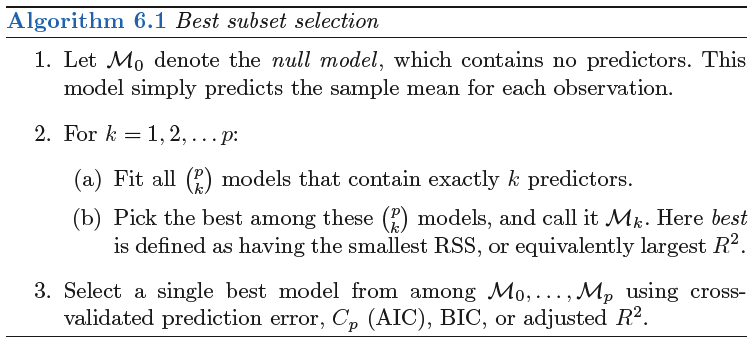

In [41]:
import itertools
def get_subsets(X_pd, dim):
    feature_names = X_pd.columns.tolist()
    # Compute all possibile combinations of 'dim' values
    subset_names = itertools.combinations(feature_names, dim)
    # Convert names into datasets
    data_subsets = [X_pd[list(fnames)] for fnames in subset_names]
    return data_subsets

subsets = get_subsets(X_train_pd, 1)
subsets[0].head() # training set of the first subset
subsets[1].head() # training set of the second subset

,cylinders
146,4.0
244,4.0
227,8.0
284,8.0
198,6.0


,displacement
146,116.0
244,78.0
227,400.0
284,302.0
198,250.0


A proper API for performing subset/forward/backward feature selection is currently missing in scikit-learn. In the following cells we are going to implement a general method that will allows us to experiment with different metrics without having to change much of the code.

This will involve, similarly to `the cross_val_score`, the assumption of working with functions having a specific signature. In particular, we will require the user to provide an `evaluator` function that is required to train a model an evaluate it against a certain training set.

```python
def evaluator(model, X, y, trained=False):
    #...
    return model, score
```

Let's create an helper function similar to the sklearn `make_scorer` that, given a scorer, generates the evaluator function that uses that scorer to evaluat the model!

In [42]:
def get_evaluator(scorer):
    def evaluator(model, X, y, trained=False):
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator    

Let's now implement the Sebset Selection routine!

```python
def subset_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,
                     # Evaluator to be used at (2.b) + best criterion (np.argmin, np.argmax)
                     candidates_evaluator, candidates_argbest,
                     # Evaluator to be used at (3.) + best criterion (np.argmin, np.argmax)
                     subsets_evaluator, subsets_argbest,
                     # Evaluator to be used to test + best criterion (np.argmin, np.argmax)
                     test_evaluator=None, test_argbest=None,
                     candidates_scorer_name=None,  # Name of first figure (referring to 2.)
                     subsets_scorer_name=None,     # Name of second figure (referring to 3.)
                     verbose=True):  
```

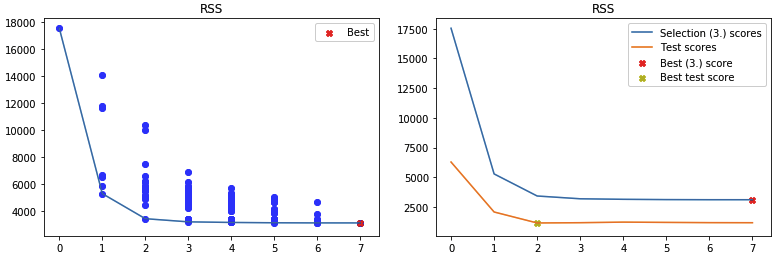

In [43]:
from sklearn.dummy import DummyRegressor

def subset_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,
                     candidates_evaluator, candidates_argbest, # Metric to be used at 2.b
                     subsets_evaluator, subsets_argbest,       # Metric to be used at 3
                     test_evaluator=None, test_argbest=None, # Metric to be used on the test set
                     candidates_scorer_name=None,  # Name of 2. figure
                     subsets_scorer_name=None,     # Name of 3. figure
                     verbose=True, weight_step3=0):  
    test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    test_argbest = subsets_argbest if not test_argbest else test_argbest
    
    # Global variable init
    # ====================
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    # subsets_* are lists containing one value for each Mk model (the best of the Mk candidates)
    subsets_test = [] 
    subsets_metric = []        # The best metric of each subset of dimension 'dim'
    subsets_best_features = [] # The best features combination in each subset of dimension 'dim'
    # A figure to keep track of candidates scores in each Mk subset
    plt.figure()
    candidate_fig = plt.subplot(111) # A global matplotlib figure
    num_evaluations = 0        # A conter to keep track of the total number of trials
    
    # 1. and 2. Evaluate all Mk candidates with
    #           k=0...P features
    # =========================================
    for dim in range(num_features+1):
        candidate_metrics = [] # Keep track of candidates metrics. Will be used to select the best
        candidate_models = []  # Keep track of candidates trained models
        
        # 2.a Fixed the number of features 'dim', look at
        #     all the possible candidate models with that
        #     cardinality
        # ===============================================
        dim_subsets = get_subsets(Xtrain_pd, dim=dim)
        for Xtrain_sub in dim_subsets:
            
            # Train the model on the subset
            if Xtrain_sub.shape[-1] == 0:
                # 1. Train the M0 model is the number of
                #    features is zero!
                # ======================================
                model = DummyRegressor()
            else:
                model = LinearRegression(fit_intercept=True)
            
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        _ = candidate_fig.scatter([dim]*len(candidate_metrics), candidate_metrics,
                                  color="b")
            
        # 2.b Select the best candidate among those using
        #     the same number of features (2.a)
        # ===============================================
        idx_best_candidate = candidates_argbest(candidate_metrics)
        # Save best candidate features
        best_features = dim_subsets[idx_best_candidate].columns.tolist()
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        subsets_best_features.append(best_features)
        
        # Compute metric for step 3.
        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = dim_subsets[idx_best_candidate]
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        best_subset_Xtest = Xtest_pd[best_subset_Xtrain.columns.tolist()]
        _, score = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        subsets_test.append(score)
        num_evaluations += weight_step3
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim, dim, best_features))
            print("M{} subset score (3.): {}".format(dim, score))
        
    # 3. Among all best candidates with increasing number
    #    of features, select the best one
    # ===================================================
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n\nBest configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    
    # Complete the subsets_fig figure by plotting
    # a line connecting all best candidate score
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
    _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
    candidate_fig.set_title(candidates_scorer_name)
    candidate_fig.legend()
    
    # Plot a figure to show how te 3. metric evolves
    plt.figure()
    subsets_fig = plt.subplot(111)
    _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
    _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
    best_test_score_idx = test_argbest(subsets_test)
    _ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
    _ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
                              marker='X', label="Best test score", color="y")
    subsets_fig.set_title(subsets_scorer_name)
    subsets_fig.legend()


............
Best model (M0) with 0 features: []
M0 subset score (3.): -0.003914007251403451
............
Best model (M1) with 1 features: ['weight']
M1 subset score (3.): 0.7156165083745584
............
Best model (M2) with 2 features: ['weight', 'model_year']
M2 subset score (3.): 0.78794441887551
............
Best model (M3) with 3 features: ['weight', 'model_year', 'origin']
M3 subset score (3.): 0.797934109327536
............
Best model (M4) with 4 features: ['displacement', 'weight', 'model_year', 'origin']
M4 subset score (3.): 0.7944379830470278
............
Best model (M5) with 5 features: ['displacement', 'weight', 'acceleration', 'model_year', 'origin']
M5 subset score (3.): 0.7854287186313151
............
Best model (M6) with 6 features: ['cylinders', 'displacement', 'weight', 'acceleration', 'model_year', 'origin']
M6 subset score (3.): 0.785904659430114
............
Best model (M7) with 7 features: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'mod

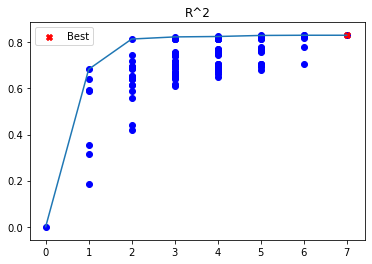

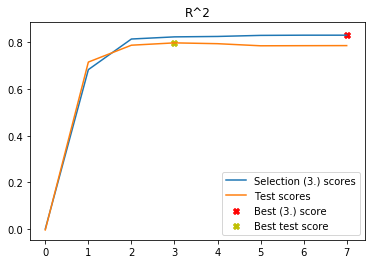

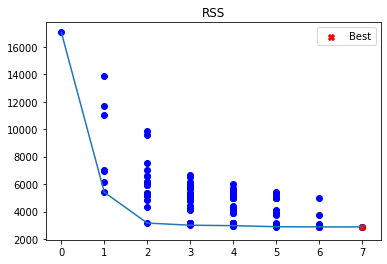

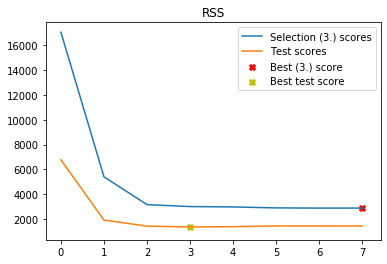

In [44]:
subset_selection(X_train_pd, y_train, X_test_pd, y_test,
                 get_evaluator(make_scorer(r2_score)), np.argmax,
                 get_evaluator(make_scorer(r2_score)), np.argmax,
                 #get_evaluator(make_scorer(mean_squared_error)), np.argmin,
                 candidates_scorer_name="R^2",
                 subsets_scorer_name="R^2",
                 verbose=True)

subset_selection(X_train_pd, y_train, X_test_pd, y_test,
                 get_evaluator(make_scorer(rss)), np.argmin,
                 get_evaluator(make_scorer(rss)), np.argmin,
                 #get_evaluator(make_scorer(mean_squared_error)), np.argmin,
                 candidates_scorer_name="RSS",
                 subsets_scorer_name="RSS",
                 verbose=False)

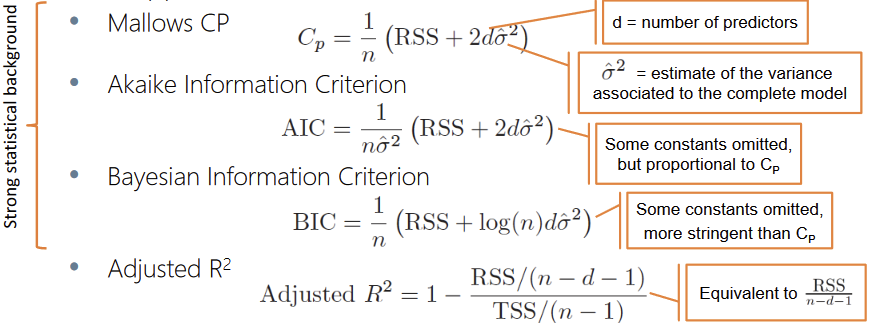

In [45]:
def estimate_sigma(Xtrain_pd, ytrain):
    # Sigma is usually estimated using the model with all features
    n, p = Xtrain_pd.shape
    model = LinearRegression(fit_intercept=True)
    model.fit(Xtrain_pd, ytrain)
    y_pred = model.predict(Xtrain_pd)
    RSS = rss(y_pred, ytrain)
    RSE = np.sqrt(RSS / (n-p))
    return RSE

def cp(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + 2*d*sigma2) / n

def aic(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + 2*d*sigma2) / (n*sigma2)

def bic(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + np.log(n)*d*sigma2) / n

def adj_r2(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    RSS = rss(y_pred, y_true)
    TSS = tss(y_true)
    return 1 - (RSS/(n-d-1)) / (TSS/(n-1))


............
Best model (M0) with 0 features: []
M0 subset score (3.): 57.40102005004883
............
Best model (M1) with 1 features: ['weight']
M1 subset score (3.): 16.2602596282959
............
Best model (M2) with 2 features: ['weight', 'model_year']
M2 subset score (3.): 12.124748229980469
............
Best model (M3) with 3 features: ['weight', 'model_year', 'origin']
M3 subset score (3.): 11.553566932678223
............
Best model (M4) with 4 features: ['displacement', 'weight', 'model_year', 'origin']
M4 subset score (3.): 11.75346565246582
............
Best model (M5) with 5 features: ['displacement', 'weight', 'acceleration', 'model_year', 'origin']
M5 subset score (3.): 12.26858901977539
............
Best model (M6) with 6 features: ['cylinders', 'displacement', 'weight', 'acceleration', 'model_year', 'origin']
M6 subset score (3.): 12.241377830505371
............
Best model (M7) with 7 features: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_y

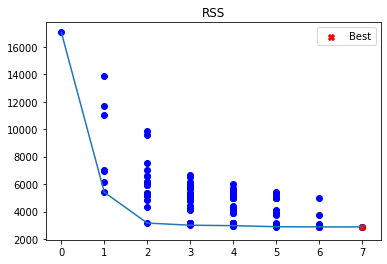

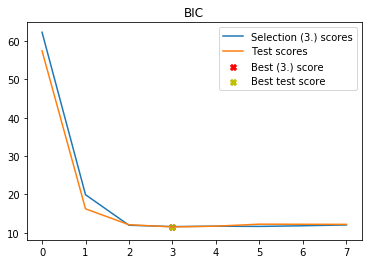

In [46]:
def get_sigma_scorer(metric, sigma):
    def scorer(model, X, y):
        n, d = X.shape
        y_pred = model.predict(X)
        return metric(y_pred, y, n, d, sigma)
    
    return scorer

sigma = estimate_sigma(X_train_pd, y_train)
subset_selection(X_train_pd, y_train, X_test_pd, y_test,
                 get_evaluator(make_scorer(rss)), np.argmin, # 2.
                 get_evaluator(get_sigma_scorer(bic, sigma)), np.argmin, # 3.
                 get_evaluator(make_scorer(mean_squared_error)), np.argmin, # test
                 candidates_scorer_name="RSS",
                 subsets_scorer_name="BIC",
                 verbose=True)

# Forward Feature Selection

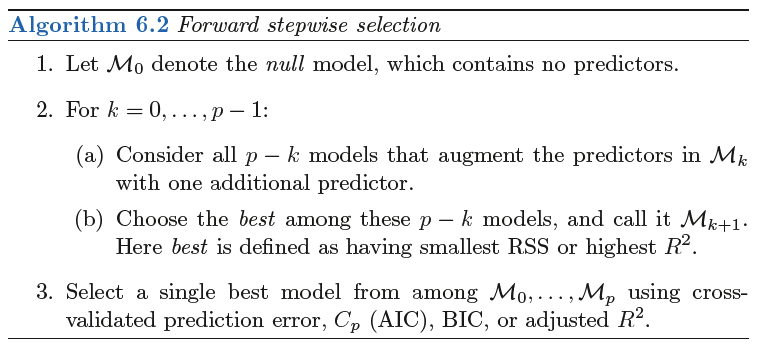

In [47]:
from sklearn.dummy import DummyRegressor

def forward_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,
                      candidates_evaluator, candidates_argbest, # Metric to be used at 2.b
                      subsets_evaluator, subsets_argbest,       # Metric to be used at 3
                      test_evaluator=None, test_argbest=None,
                      candidates_scorer_name=None,  # Name of 2. figure
                      subsets_scorer_name=None,     # Name of 3. figure
                      verbose=True, weight_step3=0):   
    test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    test_argbest = subsets_argbest if not test_argbest else test_argbest
    
    # Global variable init
    # ====================
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    # subsets_* are lists containing one value for each Mk model (the best of the Mk candidates)
    subsets_test = []
    subsets_metric = []        # The best metric of each subset of dimension 'dim'
    subsets_best_features = [] # The best features combination in each subset of dimension 'dim'
    # A figure to keep track of candidates scores in each Mk subset
    plt.figure()
    candidate_fig = plt.subplot(111) # A global matplotlib figure
    num_evaluations = 0        # A conter to keep track of the total number of trials
    
    selected_features = []
    all_features = Xtrain_pd.columns
    
    
    # 1. Train M0
    # ===========
    model = DummyRegressor()
    # Compute (2.b) metrics
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    _ = candidate_fig.scatter([0], [score], color="b")
    # Compute metric for step 3.
    _, score = test_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_test.append(score)
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    if verbose:
            print("............")
            print("Best model (M0) with 0 features: []")
            print("M0 subset score (3.): {}".format(score))
    
    # 2. Evaluate all Mk candidates with
    #    k=0...P features
    # =========================================
    for dim in range(len(all_features)):
        candidate_metrics = [] # Keep track of candidates metrics. Will be used to select the best
        candidate_models = []  # Keep track of candidates trained models
        
        # 2.a Fixed the number of features 'dim', look at
        #     all the possible candidate models with that
        #     cardinality
        # ===============================================
        remaining_features = all_features.difference(selected_features)
        
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            model = LinearRegression(fit_intercept=True)
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        _ = candidate_fig.scatter([Xtrain_sub.shape[-1]]*len(candidate_metrics), candidate_metrics,
                                  color="b")
            
        # 2.b Select the best candidate among those using
        #     the same number of features (2.a)
        # ===============================================
        idx_best_candidate = candidates_argbest(candidate_metrics)
        # Update selected feature
        selected_features.append(remaining_features[idx_best_candidate])
        # Save best candidate features
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)
        
        
        # Compute metric for step 3.
        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        best_subset_Xtest = Xtest_pd[best_features].to_numpy()
        _, score = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        subsets_test.append(score)
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim, dim, best_features))
            print("M{} subset score (3.): {}".format(dim, score))
        
    # 3. Among all best candidates with increasing number
    #    of features, select the best one
    # ===================================================
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n\nBest configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    
    # Complete the subsets_fig figure by plotting
    # a line connecting all best candidate score
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
    _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
    candidate_fig.set_title(candidates_scorer_name)
    candidate_fig.legend()
    
    # Plot a figure to show how te 3. metric evolves
    plt.figure()
    subsets_fig = plt.subplot(111)
    _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
    _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
    best_test_score_idx = test_argbest(subsets_test)
    _ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
    _ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
                              marker='X', label="Best test score", color="y")
    subsets_fig.set_title(subsets_scorer_name)
    subsets_fig.legend()

............
Best model (M0) with 0 features: []
M0 subset score (3.): 62.23949304288321
............
Best model (M0) with 0 features: ['weight']
M0 subset score (3.): 16.2602596282959
............
Best model (M1) with 1 features: ['weight', 'model_year']
M1 subset score (3.): 12.124748229980469
............
Best model (M2) with 2 features: ['weight', 'model_year', 'origin']
M2 subset score (3.): 11.553566932678223
............
Best model (M3) with 3 features: ['weight', 'model_year', 'origin', 'displacement']
M3 subset score (3.): 11.753457069396973
............
Best model (M4) with 4 features: ['weight', 'model_year', 'origin', 'displacement', 'acceleration']
M4 subset score (3.): 12.268588066101074
............
Best model (M5) with 5 features: ['weight', 'model_year', 'origin', 'displacement', 'acceleration', 'cylinders']
M5 subset score (3.): 12.241377830505371
............
Best model (M6) with 6 features: ['weight', 'model_year', 'origin', 'displacement', 'acceleration', 'cylinder

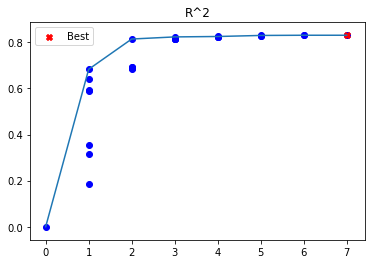

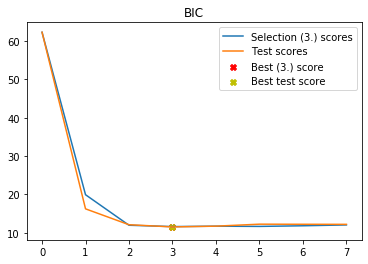

In [48]:
forward_selection(X_train_pd, y_train, X_test_pd, y_test,
                  get_evaluator(make_scorer(r2_score)), np.argmax, # 2.
                  get_evaluator(get_sigma_scorer(bic, sigma)), np.argmin, # 3.
                  get_evaluator(make_scorer(mean_squared_error)), np.argmin, # test
                  candidates_scorer_name="R^2",
                  subsets_scorer_name="BIC",
                  verbose=True)

# Forward Feature Selection with Cross-Validation


............
Best model (M0) with 0 features: []
M0 subset score (3.): -0.014583269186402492
............
Best model (M0) with 0 features: ['weight']
M0 subset score (3.): 0.7156165083745584
............
Best model (M1) with 1 features: ['weight', 'model_year']
M1 subset score (3.): 0.78794441887551
............
Best model (M2) with 2 features: ['weight', 'model_year', 'origin']
M2 subset score (3.): 0.797934109327536
............
Best model (M3) with 3 features: ['weight', 'model_year', 'origin', 'displacement']
M3 subset score (3.): 0.7944380949224376
............
Best model (M4) with 4 features: ['weight', 'model_year', 'origin', 'displacement', 'acceleration']
M4 subset score (3.): 0.7854287751748594
............
Best model (M5) with 5 features: ['weight', 'model_year', 'origin', 'displacement', 'acceleration', 'cylinders']
M5 subset score (3.): 0.7859046804509245
............
Best model (M6) with 6 features: ['weight', 'model_year', 'origin', 'displacement', 'acceleration', 'cylin

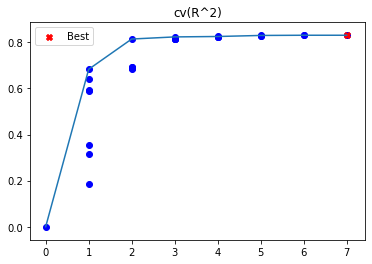

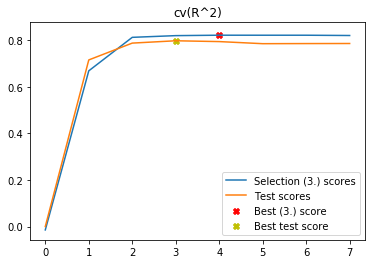

In [49]:
def get_cv_evaluator(scorer, cv=3):
    def evaluator(model, X, y, trained=False):            
        scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
        if not trained:
            model = model.fit(X, y)
        return model, np.mean(scores)
    
    return evaluator

def get_val_evaluator(scorer, val_size=0.1):
    def evaluator(model, X, y, trained=False):
        X_train_small, X_val, y_train_small, y_val = train_test_split(X, y, 
                                                                      test_size=val_size,
                                                                      random_state=mpg_test_seed)
        
        if not trained:
            model = model.fit(X_train_small, y_train_small)
        score = scorer(model, X_val, y_val) 
        
        return model, score
    
    return evaluator

sigma = estimate_sigma(X_train_pd, y_train)
forward_selection(X_train_pd, y_train, X_test_pd, y_test,
                  get_evaluator(make_scorer(r2_score)), np.argmax, # 2.b
                  get_cv_evaluator(make_scorer(r2_score), cv=10), np.argmax, # 3.
                  get_evaluator(make_scorer(r2_score)), np.argmax, # test
                  candidates_scorer_name="cv(R^2)",
                  subsets_scorer_name="cv(R^2)",
                  verbose=True, weight_step3=10)